## Chapter 2 Visualizing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Show the graphs inline with the code!
%matplotlib inline

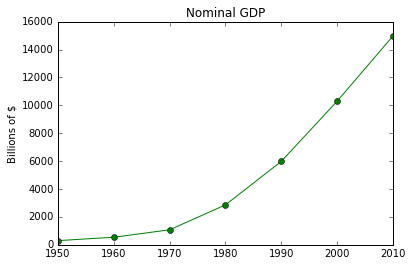

In [8]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

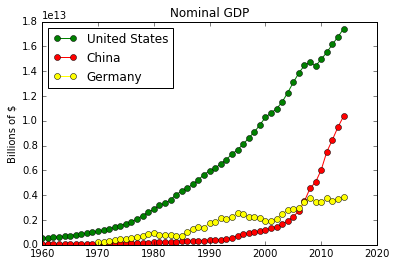

In [75]:
gdp = pd.read_csv('data/gdp.csv')

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(gdp[gdp.Name == "United States"].Year.tolist(), gdp[gdp.Name == "United States"].Value.tolist(), color='green', marker='o', linestyle='solid', label="United States")
plt.plot(gdp[gdp.Name == "China"].Year.tolist(), gdp[gdp.Name == "China"].Value.tolist(), color='red', marker='o', linestyle='solid', label="China")
plt.plot(gdp[gdp.Name == "Germany"].Year.tolist(), gdp[gdp.Name == "Germany"].Value.tolist(), color='Yellow', marker='o', linestyle='solid', label="Germany")


plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.legend(loc=2)
plt.show()

### Bar Charts

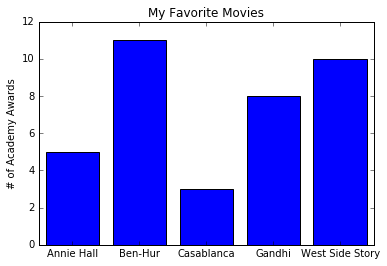

In [41]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

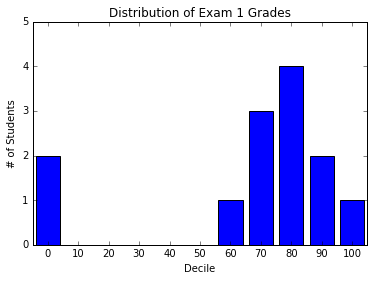

In [71]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = {}
for grade in grades:
    if(decile(grade) in histogram):
        histogram[decile(grade)] += 1
    else:
        histogram[decile(grade)] = 1
        
        
plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(), # give each bar its correct height
            8) # give each bar a width of 8
plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105,
                        # y-axis from 0 to 5
    
plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

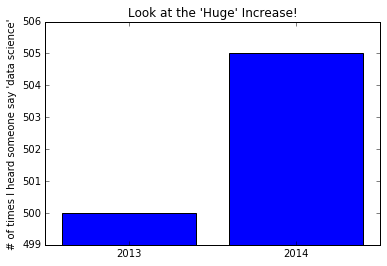

In [73]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1

# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

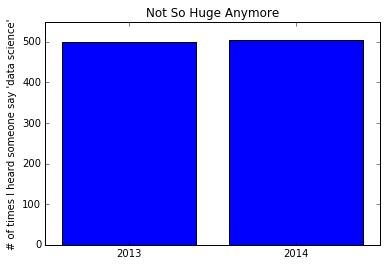

In [74]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1

# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

In [3]:
babies = pd.read_csv('data/ga_baby_names.csv')
babies = babies[babies.Gender == "F"]
babies = babies[babies.Year == 1920]
babies.sort_values(["Number"],ascending=[1])
babies = babies.head(5)
babies

,State,Gender,Year,Name,Number
5142,GA,F,1920,Mary,2538
5143,GA,F,1920,Annie,1048
5144,GA,F,1920,Dorothy,769
5145,GA,F,1920,Ruby,667
5146,GA,F,1920,Willie,623


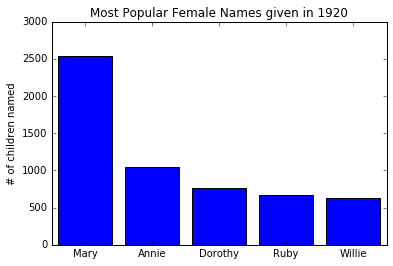

In [4]:
# create a line chart, years on x-axis, gdp on y-axis
names = babies.Name.tolist()
counts = babies.Number.tolist()

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(names)]
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, counts)
plt.ylabel("# of children named")
plt.title("Most Popular Female Names given in 1920")
# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(names)], names)
plt.show()

### Line Charts

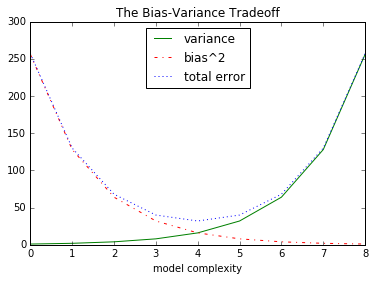

In [106]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

In [112]:
babies = pd.read_csv('data/ga_baby_names.csv')
babies.head(5)

,State,Gender,Year,Name,Number
0,GA,F,1910,Mary,841
1,GA,F,1910,Annie,553
2,GA,F,1910,Mattie,320
3,GA,F,1910,Ruby,279
4,GA,F,1910,Willie,275


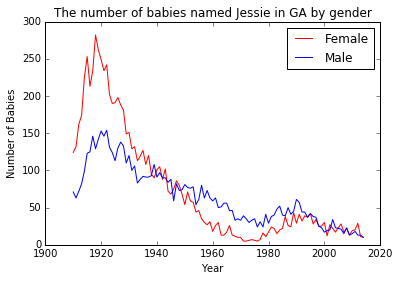

In [125]:
plt.plot(babies[(babies.Name == "Jessie") & (babies.Gender == "F")].Year, babies[(babies.Name == "Jessie") & (babies.Gender == "F")].Number, 'r-', label='Female') # green solid line
plt.plot(babies[(babies.Name == "Jessie") & (babies.Gender == "M")].Year, babies[(babies.Name == "Jessie") & (babies.Gender == "M")].Number, 'b-', label='Male')


plt.legend(loc=1)
plt.xlabel("Year")
plt.ylabel("Number of Babies")
plt.title("The number of babies named Jessie in GA by gender")
plt.show()

### Scatter Plots

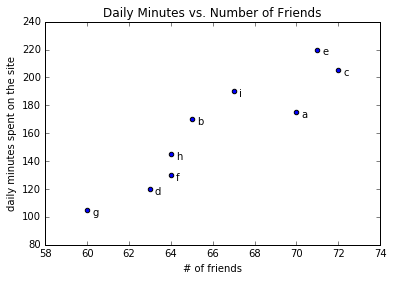

In [104]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
    xy=(friend_count, minute_count), # put the label with its point
    xytext=(5, -5), # but slightly offset
    textcoords='offset points')
    plt.title("Daily Minutes vs. Number of Friends")

plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

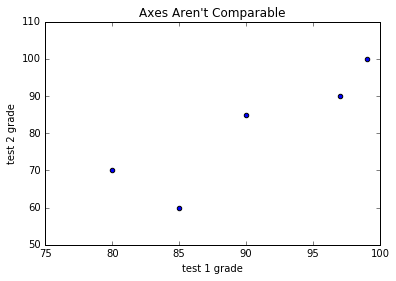

In [105]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

In [34]:
Names = ["Jessie","Harper","James","Dana","Hayden","Jean","Chris"]
babies = pd.read_csv('data/ga_baby_names.csv')
babies = babies[(babies.Name.isin(Names))]
del babies["State"]
del babies["Year"]
babies = babies.groupby(['Name','Gender'], as_index=False).sum().sort_values(['Name','Number'])

babies

,Name,Gender,Number
0,Chris,F,256
1,Chris,M,3437
3,Dana,M,790
2,Dana,F,5402
5,Harper,M,151
4,Harper,F,1347
6,Hayden,F,955
7,Hayden,M,2978
8,James,F,982
9,James,M,182020


In [35]:
table = {}
for name in Names:
    male = babies[(babies.Name == name) & ((babies.Gender == 'M'))].values.tolist()[0][2]
    female = babies[(babies.Name == name) & ((babies.Gender == 'F'))].values.tolist()[0][2]
    print(name,male,female)
    table[name] = (male, female)

print(table)

Jessie 6816 7689
Harper 151 1347
James 182020 982
Dana 790 5402
Hayden 2978 955
Jean 144 5085
Chris 3437 256
{'Chris': (3437, 256), 'Jessie': (6816, 7689), 'Jean': (144, 5085), 'Harper': (151, 1347), 'Dana': (790, 5402), 'James': (182020, 982), 'Hayden': (2978, 955)}


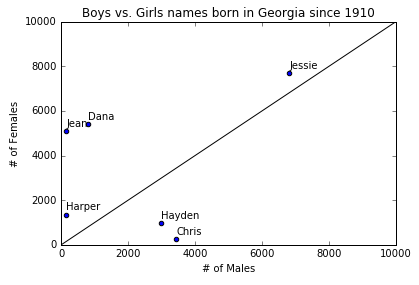

In [46]:
for name in table:
    x = table[name][0]
    y = table[name][1]
    plt.scatter(x,y)
    plt.annotate(name,
        xy=(x, y), # put the label with its point
        xytext=(0, 5), # but slightly offset
        textcoords='offset points')

plt.plot([0, 20000], [0, 20000], 'k-', lw=1)

plt.title("Boys vs. Girls names born in Georgia since 1910")
plt.xlabel("# of Males")
plt.ylabel("# of Females")
axes = plt.gca()
axes.set_xlim([0,10000])
axes.set_ylim([0,10000])


plt.show()